In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [218]:
df = pd.read_csv('C:/Users/SLN6CT/Desktop/IA/Data/Planilha/coffee.csv') 

In [219]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [220]:
def extrair(texto):
    if isinstance(texto, str) and len(texto) >= 19:
        return texto[11:19]
    else:
        return '00:00:00'
df['Horario'] = df['datetime'].apply(extrair)
del df['datetime']


In [221]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'] = df['date'].dt.strftime('%d/%m/%Y')
df = df.rename(columns={'date':'Data', 'cash_type':'Pagamento', 'money': 'Valor', 'coffee_name':'Bebida', 'card':'Cartao'})

In [222]:
mapping = {
    'Tea': '1',
    'Espresso': '2', 
    'Chocolate with coffee': '3', 
    'Chocolate with milk': '4',
    'Coffee with Irish whiskey': '5', 
    'Irish whiskey with milk': '6',
    'Double Irish whiskey': '7', 
    'Double espresso': '8', 
    'Americano with milk': '9',
    'Cappuccino': '10', 
    'Double espresso with milk': '11',
    'Caramel with Irish whiskey': '12', 
    'Latte': '13', 
    'Americano': '14',
    'Super chocolate': '15', 
    'Double vanilla': '16', 
    'Mochaccino': '17',
    'Caramel with chocolate': '18', 
    'Irish whiskey': '19', 
    'Caramel coffee': '20',
    'Vanilla with Irish whiskey': '21', 
    'Chocolate': '22', 
    'Caramel with milk': '23',
    'Coffee with chocolate': '24', 
    'Irish with chocolate': '25', 
    'Vanilla coffee': '26',
    'Double ristretto': '27', 
    'Hot milkshake': '28', 
    'Double chocolate': '29', 
    'Caramel': '30',
    'Hot Chocolate': '31', 
    'Americano with Milk': '32', 
    'Cocoa': '33', 
    'Cortado': '34'
}
df['NumeroBebida'] = df['Bebida'].astype(str)
df['NumeroBebida'] = df['NumeroBebida'].map(mapping)
df['NumeroBebida'].unique()

array(['13', '31', '14', '32', '33', '34', '2', '10'], dtype=object)

In [223]:
df = df[['Data', 'Horario', 'Bebida', 'NumeroBebida', 'Valor', 'Pagamento', 'Cartao']]
df

,Data,Horario,Bebida,NumeroBebida,Valor,Pagamento,Cartao
0,01/03/2024,10:15:50,Latte,13,38.70,card,ANON-0000-0000-0001
1,01/03/2024,12:19:22,Hot Chocolate,31,38.70,card,ANON-0000-0000-0002
2,01/03/2024,12:20:18,Hot Chocolate,31,38.70,card,ANON-0000-0000-0002
3,01/03/2024,13:46:33,Americano,14,28.90,card,ANON-0000-0000-0003
4,01/03/2024,13:48:14,Latte,13,38.70,card,ANON-0000-0000-0004
...,...,...,...,...,...,...,...
3631,23/03/2025,10:34:54,Cappuccino,10,35.76,card,ANON-0000-0000-1158
3632,23/03/2025,14:43:37,Cocoa,33,35.76,card,ANON-0000-0000-1315
3633,23/03/2025,14:44:16,Cocoa,33,35.76,card,ANON-0000-0000-1315
3634,23/03/2025,15:47:28,Americano,14,25.96,card,ANON-0000-0000-1316


In [224]:
value = df[(df['Cartao'].isna())]
value = value[(value['Pagamento']=="card")]
value

,Data,Horario,Bebida,NumeroBebida,Valor,Pagamento,Cartao


In [225]:
value = df[(df['Cartao']=="Money")]
value = value[(value['Pagamento']=="cash")]
value

,Data,Horario,Bebida,NumeroBebida,Valor,Pagamento,Cartao


In [226]:
df['Cartao'] = df['Cartao'].fillna('Money')

In [227]:
df.columns

Index(['Data', 'Horario', 'Bebida', 'NumeroBebida', 'Valor', 'Pagamento',
       'Cartao'],
      dtype='object')

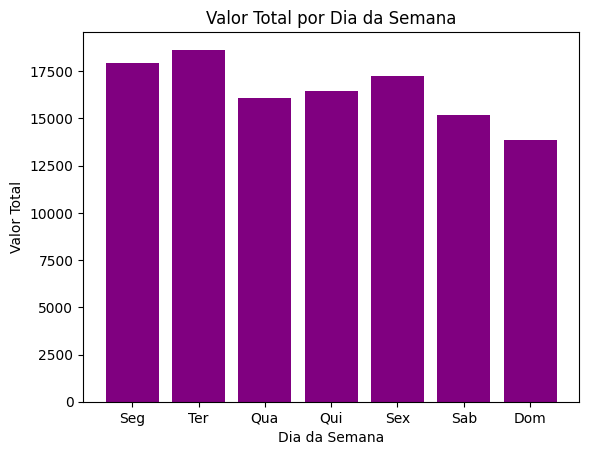

In [228]:
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True) 
df['DiaSemana'] = df['Data'].dt.day_name()
g = df.groupby('DiaSemana').agg({'Valor': 'sum'}).reset_index()
dias = { 
    'Monday': 'Seg',
    'Tuesday': 'Ter',
    'Wednesday': 'Qua',
    'Thursday': 'Qui',
    'Friday': 'Sex',
    'Saturday': 'Sab',
    'Sunday': 'Dom'
}
g['DiaSemana'] = g['DiaSemana'].map(dias)
ordenados = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom'] 
g['DiaSemana'] = pd.Categorical(g['DiaSemana'], categories=ordenados, ordered=True) 
g = g.sort_values('DiaSemana')

plt.bar(g['DiaSemana'], g['Valor'], color='purple')
plt.xlabel('Dia da Semana')
plt.ylabel('Valor Total')
plt.title('Valor Total por Dia da Semana')
plt.show()


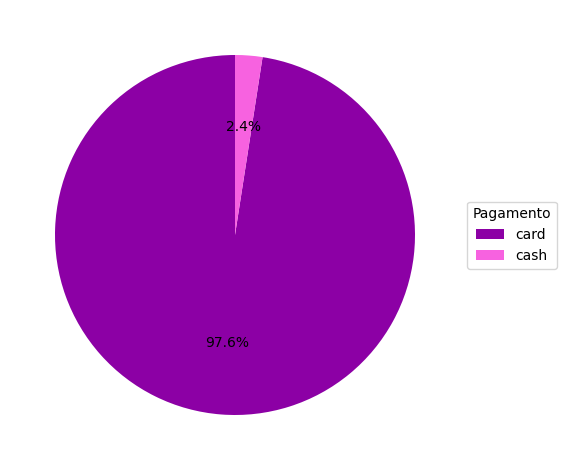

In [229]:
g = df['Pagamento'].value_counts()

colors = ["#8C00A5", "#F762E0"]  

plt.pie(g,
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors)

plt.legend(g.index, title="Pagamento", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), frameon=True)
plt.ylabel('')
plt.tight_layout()
plt.show()


In [230]:
df['Horario'].min()

'06:50:04'

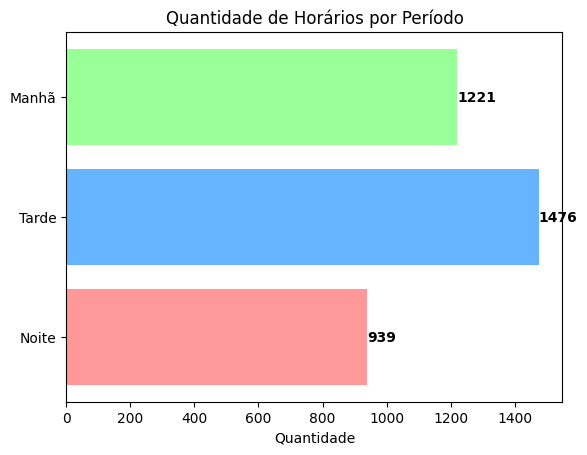

In [231]:
manha = 0
tarde = 0
noite = 0

for horario in df['Horario']:
    if '06:50:00' < horario < '12:00:00':
        manha += 1
    elif '12:00:00' <= horario < '18:00:00':
        tarde += 1
    else:
        noite += 1

periodos = ['Noite', 'Tarde', 'Manhã']
valores = [noite, tarde, manha ]
plt.barh(periodos, valores, color=['#FF9999', '#66B3FF', '#99FF99'])

for i, v in enumerate(valores):
    plt.text(v + 0.1, i, str(v), va='center', fontweight='bold')
    
plt.xlabel('Quantidade')
plt.title('Quantidade de Horários por Período')
plt.show()


In [232]:
dias = { 
    'Monday': '2',
    'Tuesday': '3',
    'Wednesday': '4',
    'Thursday': '5',
    'Friday': '6',
    'Saturday': '7',
    'Sunday': '1'
}
df['DiaSemana'] = df['DiaSemana'].map(dias)

x_sales = df.iloc[:, 7].values
y_sales = df.iloc[:, 4].values

In [233]:
df

,Data,Horario,Bebida,NumeroBebida,Valor,Pagamento,Cartao,DiaSemana
0,2024-03-01,10:15:50,Latte,13,38.70,card,ANON-0000-0000-0001,6
1,2024-03-01,12:19:22,Hot Chocolate,31,38.70,card,ANON-0000-0000-0002,6
2,2024-03-01,12:20:18,Hot Chocolate,31,38.70,card,ANON-0000-0000-0002,6
3,2024-03-01,13:46:33,Americano,14,28.90,card,ANON-0000-0000-0003,6
4,2024-03-01,13:48:14,Latte,13,38.70,card,ANON-0000-0000-0004,6
...,...,...,...,...,...,...,...,...
3631,2025-03-23,10:34:54,Cappuccino,10,35.76,card,ANON-0000-0000-1158,1
3632,2025-03-23,14:43:37,Cocoa,33,35.76,card,ANON-0000-0000-1315,1
3633,2025-03-23,14:44:16,Cocoa,33,35.76,card,ANON-0000-0000-1315,1
3634,2025-03-23,15:47:28,Americano,14,25.96,card,ANON-0000-0000-1316,1


In [234]:
from sklearn.model_selection import train_test_split

x_sales_train, x_sales_test , y_sales_train, y_sales_test = train_test_split(x_sales, y_sales, test_size=0.3, random_state=0)

x_sales_train.shape, x_sales_test.shape

((2545,), (1091,))

In [ ]:
x_sales = df.iloc[:, 7].values
y_sales = df.iloc[:,4].values

x_sales_train = x_sales_train.reshape(-1, 1)
x_sales_test = x_sales_test.reshape(-1, 1)


In [239]:
from sklearn.tree import DecisionTreeRegressor

regression_sales = DecisionTreeRegressor()
regression_sales.fit(x_sales_train, y_sales_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [240]:
regression_sales.score(x_sales_train, y_sales_train)

0.0013003416737342732

In [241]:
regression_sales.score(x_sales_test, y_sales_test)

-0.0009958422092963826

In [242]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

x_sales_poly = poly.fit_transform(x_sales_train)
x_sales_test_poly = poly.transform(x_sales_test)

regressor_poly = LinearRegression()
regressor_poly.fit(x_sales_poly, y_sales_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [243]:
previsao = regressor_poly.predict(x_sales_test_poly)
previsao

array([31.69434923, 31.63733581, 31.63733581, ..., 31.60424786,
       31.60424786, 31.60424786])

In [247]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_sales_test, previsao)

4.21227815744466

In [248]:
mse = mean_squared_error(y_sales_test, previsao)
print(f"MSE: {mse}")
rmse = np.sqrt(mean_squared_error(y_sales_test, previsao))
print(f"RMSE: {rmse}")

MSE: 24.564922513796326
RMSE: 4.956301293686283
